<a href="https://colab.research.google.com/github/curieuxjy/Quantum-Computing/blob/master/modu-q101/250427_hands_on_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit_aer matplotlib pylatexenc koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=22866dc2675140bb1534529ad11de37b715eaded8f67cedba4a775ccc9bae600
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c9

## example-1 : X-gate

- 하나의 큐비트를 |0⟩ 상태로 초기화
- X 게이트를 적용하여 |1⟩ 상태로 변환
- 큐비트를 측정하여 결과를 클래식 비트에 저장
- 1000번 실행하여, 항상 '1'을 얻을 것으로 예상됨

생성된 양자 회로:


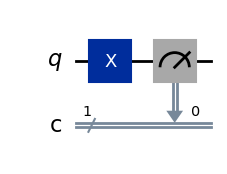

측정 결과: {'1': 1000}


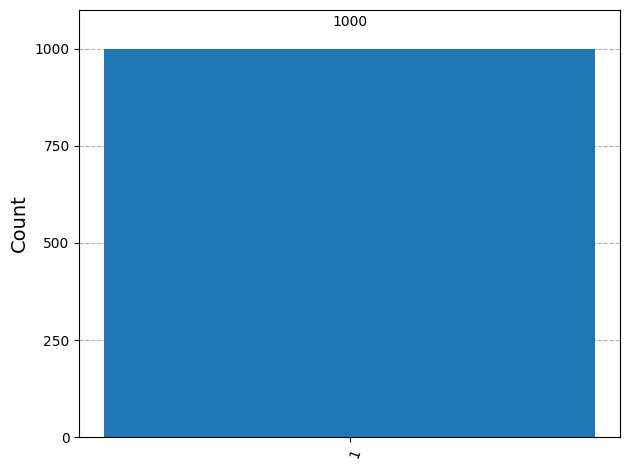

In [ ]:
# 필요한 라이브러리 불러오기
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1개의 큐비트와 1개의 클래식 비트를 가진 회로 생성
qc = QuantumCircuit(1, 1)

# X 게이트 적용 (0→1, 1→0 반전)
qc.x(0)

# 측정 추가
qc.measure(0, 0)

# 회로 시각화
print("생성된 양자 회로:")
display(qc.draw('mpl'))

# 시뮬레이터 생성
simulator = AerSimulator()

# 회로 실행
job = simulator.run(transpile(qc, simulator), shots=1000)
result = job.result()

# 결과 얻기
counts = result.get_counts(qc)
print("측정 결과:", counts)

# 결과 시각화
plot_histogram(counts)

## example-2 : Hadamard gate

- 하나의 큐비트를 |0⟩ 상태로 초기화
- H 게이트(Hadamard 게이트)를 적용하여 |0⟩과 |1⟩의 동등한 중첩 상태 (|0⟩+|1⟩)/√2 생성
- 큐비트 측정 시 약 50%의 확률로 0, 약 50%의 확률로 1 관측

생성된 양자 회로:


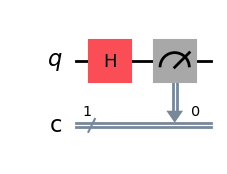

측정 결과: {'1': 489, '0': 511}


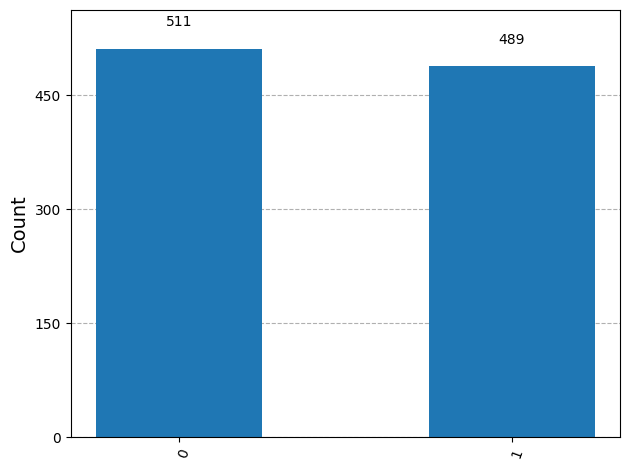

In [ ]:
# 1개의 큐비트와 1개의 클래식 비트를 가진 회로 생성
qc = QuantumCircuit(1, 1)

# H 게이트 적용 (중첩 상태 생성)
qc.h(0)

# 측정 추가
qc.measure(0, 0)

# 회로 시각화
print("생성된 양자 회로:")
display(qc.draw('mpl'))

# 시뮬레이터 생성 및 실행
simulator = AerSimulator()
job = simulator.run(transpile(qc, simulator), shots=1000)
result = job.result()

# 결과 얻기 및 시각화
counts = result.get_counts(qc)
print("측정 결과:", counts)
plot_histogram(counts)

## example-3 : 블로흐 구면 (Bloch Sphere)

- 단일 큐비트 상태를 3D 구면에 표현:

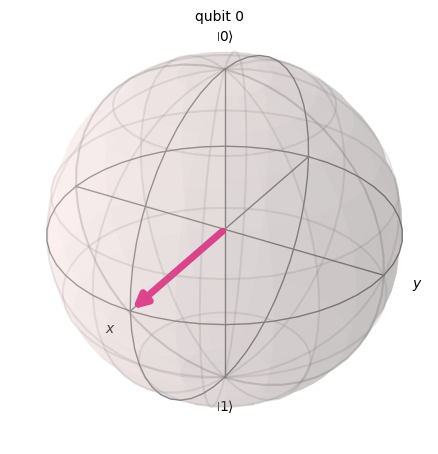

In [ ]:
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_bloch_multivector

# 중첩 상태 회로
qc = QuantumCircuit(1)
qc.h(0)  # Hadamard 게이트 적용

# 상태벡터 시뮬레이션
sv_sim = StatevectorSimulator()
state = sv_sim.run(qc).result().get_statevector()

# 블로흐 구면에 시각화
plot_bloch_multivector(state)

## example-4 : Z 게이트와 블로흐 구면

- 이 예시는 Z 게이트가 큐비트의 위상에 어떤 영향을 미치는지 블로흐 구면을 통해 시각적으로 보여줍니다.

- Z 게이트는 ∣0⟩ 상태에는 영향을 주지 않지만, ∣1⟩ 상태에는 −1의 위상(phase)을 곱해줍니다.

Z 게이트 적용 후 블로흐 구면 시각화:


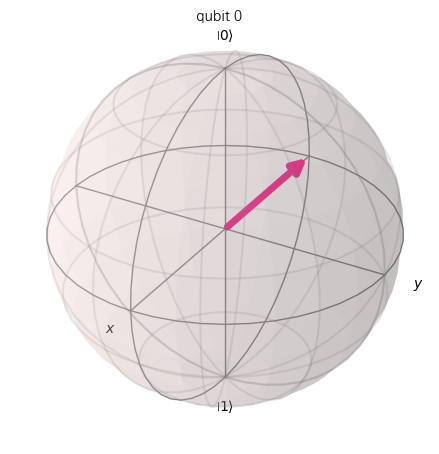

In [ ]:
# 필요한 라이브러리 불러오기
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_bloch_multivector
from math import pi

# 1개의 큐비트를 가진 회로 생성
qc = QuantumCircuit(1)

# 초기 상태: |+> 상태 (H 게이트 적용)
qc.h(0)

# Z 게이트 적용
qc.z(0)

# 상태벡터 시뮬레이션
sv_sim = StatevectorSimulator()
state = sv_sim.run(qc).result().get_statevector()

# 블로흐 구면에 시각화
print("Z 게이트 적용 후 블로흐 구면 시각화:")
display(plot_bloch_multivector(state))

## 예시 5: 간단한 Deutsch-Jozsa 알고리즘 (상수 함수)

- 이 예시는 Deutsch-Jozsa 알고리즘의 간단한 경우로, 입력에 상관없이 항상 같은 값을 출력하는 상수 함수를 구별하는 회로입니다.

Deutsch-Jozsa 상수 함수 회로:


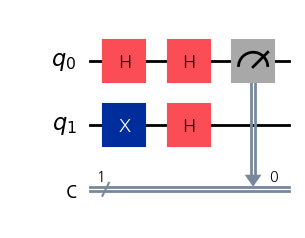

측정 결과: {'0': 1000}


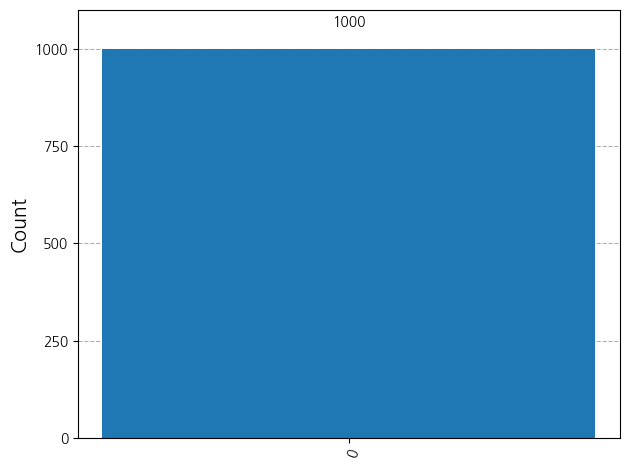

In [ ]:
# 필요한 라이브러리 불러오기
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 2개의 큐비트 (입력 1개, 보조 1개)와 1개의 클래식 비트를 가진 회로 생성
qc = QuantumCircuit(2, 1)

# 보조 큐비트를 |-> 상태로 초기화
qc.x(1)
qc.h(1)

# 입력 큐비트에 H 게이트 적용
qc.h(0)

# 배타적 OR(XOR) 게이트 (상수 함수 역할을 함 - 입력 큐비트에 상관없이 보조 큐비트에 영향을 주지 않음)
# 상수 함수 f(x) = 0 인 경우: CNOT 없이 통과
# 상수 함수 f(x) = 1 인 경우:qc.cx(0, 1) # 입력에 상관없이 보조 큐비트를 뒤집음 -> 주석 처리하여 상수 함수 0 표현

# 다시 입력 큐비트에 H 게이트 적용
qc.h(0)

# 입력 큐비트 측정
qc.measure(0, 0)

# 회로 시각화
print("Deutsch-Jozsa 상수 함수 회로:")
display(qc.draw('mpl'))

# 시뮬레이터 생성 및 실행
simulator = AerSimulator()
job = simulator.run(transpile(qc, simulator), shots=1000)
result = job.result()

# 결과 얻기 및 시각화
counts = result.get_counts(qc)
print("측정 결과:", counts)
plot_histogram(counts)